Read the normalized df.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df = pd.read_csv("UsedCarSellingInfoCraigslist_Normalized.csv")
df.head()

,Unnamed: 0,price,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,weather,VClass,youSaveSpend,usage_yr,region,division
0,0,11900,dodge,6,gas,43600.0,clean,automatic,rwd,38,midsize cars,-5750,9,Midwest,West North Central
1,1,2800,ford,6,gas,168591.0,clean,automatic,fwd,47,large cars,-2250,15,Midwest,West North Central
2,2,2800,ford,6,gas,168591.0,clean,automatic,fwd,47,large cars,-2250,15,Midwest,West North Central
3,3,400,pontiac,0,gas,217000.0,clean,automatic,fwd,47,midsize cars,-1750,18,Midwest,West North Central
4,4,9900,gmc,8,gas,169000.0,clean,automatic,4wd,38,standard pickup trucks 4wd,-5000,12,Midwest,West North Central


Let's drop 'Unnamed: 0'.

In [2]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
df.columns

Index(['price', 'manufacturer', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'weather', 'VClass',
       'youSaveSpend', 'usage_yr', 'region', 'division'],
      dtype='object')

# EDA after Dataset Cleansed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519313 entries, 0 to 519312
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         519313 non-null  int64  
 1   manufacturer  519313 non-null  object 
 2   cylinders     519313 non-null  int64  
 3   fuel          519313 non-null  object 
 4   odometer      519313 non-null  float64
 5   title_status  518998 non-null  object 
 6   transmission  519313 non-null  object 
 7   drive         519313 non-null  object 
 8   weather       519313 non-null  int64  
 9   VClass        519313 non-null  object 
 10  youSaveSpend  519313 non-null  int64  
 11  usage_yr      519313 non-null  int64  
 12  region        519313 non-null  object 
 13  division      519313 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 55.5+ MB


In [4]:
df.describe()

,price,cylinders,odometer,weather,youSaveSpend,usage_yr
count,5.193130e+05,519313.000000,5.193130e+05,519313.000000,519313.000000,519313.000000
mean,5.450531e+04,4.271863,1.166391e+05,52.778124,-2648.265112,12.423196
std,6.550525e+06,3.003980,1.396323e+05,7.559567,2075.191196,9.062997
min,1.000000e+00,0.000000,0.000000e+00,29.000000,-13250.000000,0.000000
25%,3.750000e+03,0.000000,6.000000e+04,48.000000,-5000.000000,6.000000
50%,7.800000e+03,4.000000,1.100000e+05,52.000000,-1750.000000,11.000000
75%,1.549900e+04,6.000000,1.560000e+05,59.000000,-1000.000000,16.000000
max,1.500000e+09,12.000000,1.000000e+07,79.000000,3250.000000,119.000000


In [6]:
df.columns

Index(['price', 'manufacturer', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'weather', 'VClass',
       'youSaveSpend', 'usage_yr', 'region', 'division'],
      dtype='object')

# 1) Are features normally distributed?

C:\Users\danie\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danie\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danie\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

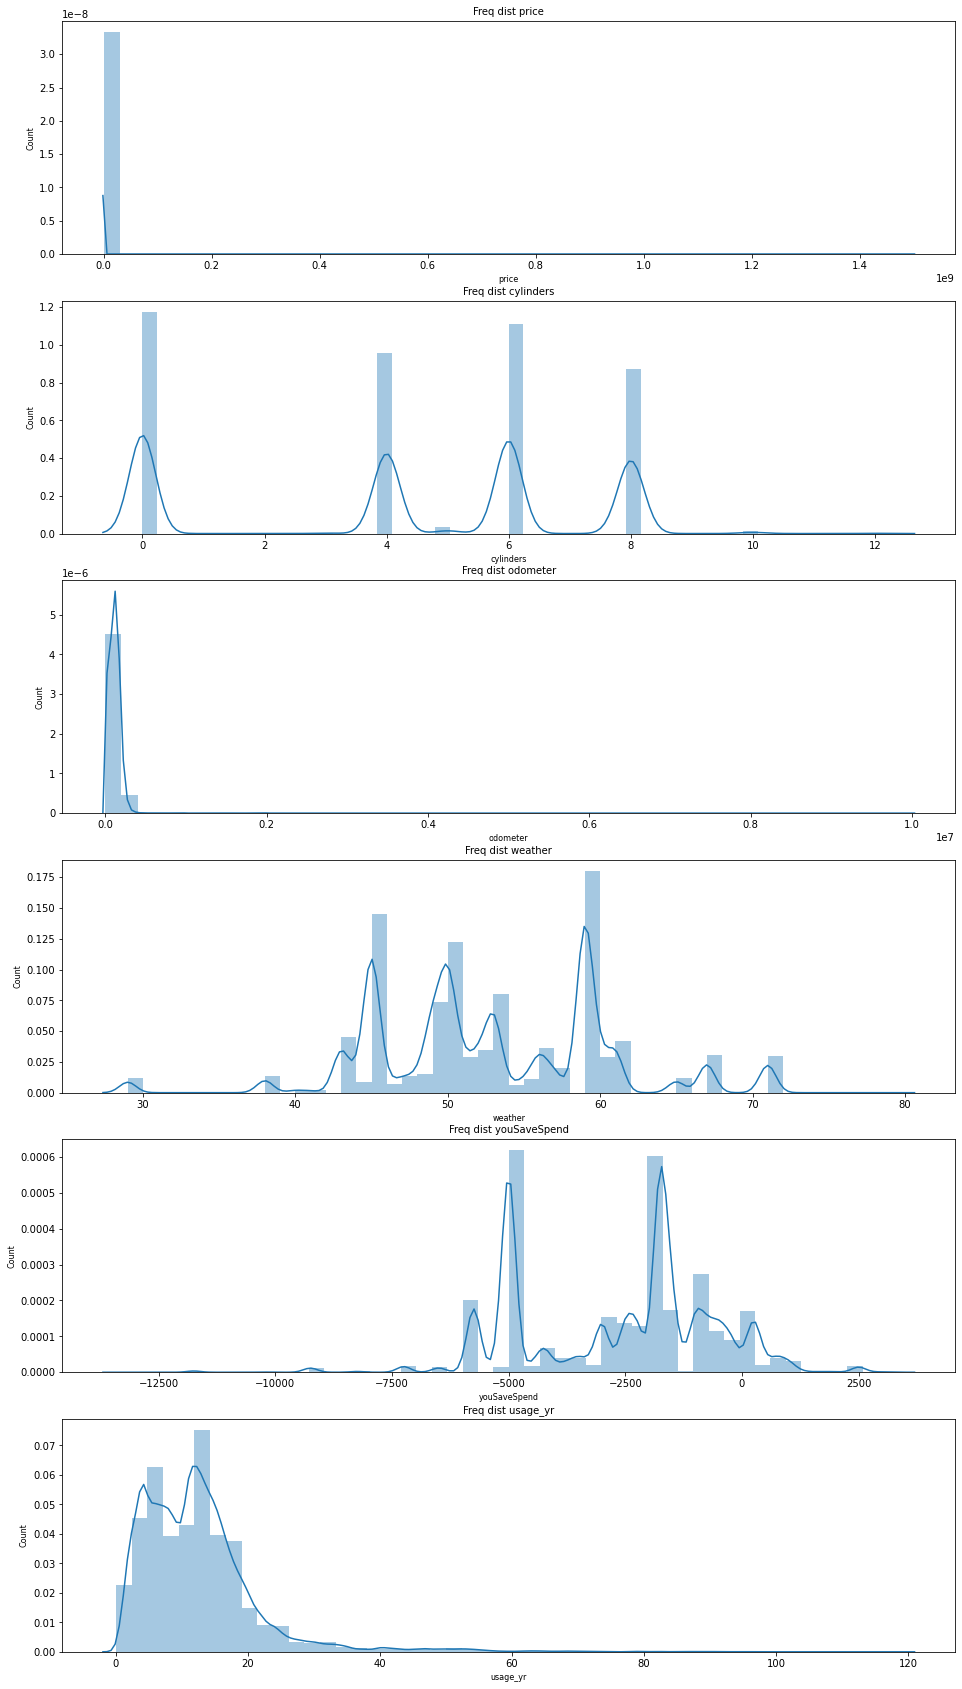

In [8]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

col_names = ['price', 'cylinders', 'odometer','weather', 'youSaveSpend', 'usage_yr']

fig, ax = plt.subplots(len(col_names), figsize=(16,30))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.show();
#plt.savefig('normalized_hist.png')

Such numerical features as 'price', 'cylinders', 'odometer','weather', 'youSaveSpend', and 'usage_yr' seem NOT normally distributed.

Rather, 'usage_yr' is right-skewed, which shows that most used cars listed in Cragslist span from 0 through 20 years old. 

In [13]:
from scipy import stats
import pylab

k,p = stats.shapiro(df['usage_yr'])
print("The test statistic is %s and the p-value is %s" % (k,p))

The test statistic is 0.8117110729217529 and the p-value is 0.0


C:\Users\danie\Anaconda\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Based on this p-value from the Shapiro-Wilk test, the sample, 'df.usage_yr' does not appear to be from a normal distribution.

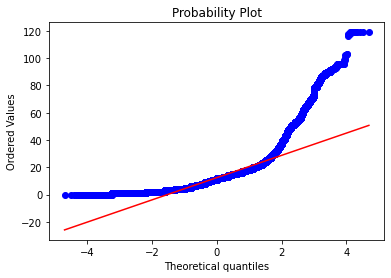

In [14]:
#creating the Q-Q plot to check for Normality

_=stats.probplot(df['usage_yr'], dist='norm', plot=pylab)
pylab.show()

Based on the Q-Q plot, this same distribution does not appears to be normal as well..

In [15]:
#Creating an array of means from a given sample and size
def clt(sample,sample_size, iterations):
    means = np.empty(iterations)
    for i in range(iterations):
        new_sample = np.random.choice(sample,size=sample_size)
        n_mean = np.mean(new_sample)
        means[i]=n_mean
    return means

In [16]:
n100000 = clt(df['usage_yr'],10000,10000)
n100000

array([12.5411, 12.3836, 12.2977, ..., 12.429 , 12.44  , 12.533 ])

C:\Users\danie\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


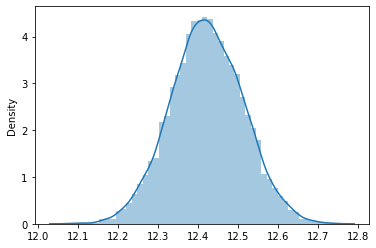

In [19]:
import matplotlib.pyplot as plt
_ = sns.distplot(n100000)

# 2) Is the sample size large? Are the observations independent?

In [20]:
len(n100000)

10000

The n in this sample is 1000, which constitutes a large sample size in that it is well over the the threshold of 30 needed for the Central Limit Theorem to apply.

# 3. Is the true population mean really 12.4 years?

In [24]:
import statistics
statistics.mean(df.usage_yr)

12.423195645015626

In [25]:
#bootstrap test
#temp = df['usage_yr']
def bootstrap_test(sample,iterations):
    means = np.empty(iterations)
    for i in range(iterations):
        new_sample = np.random.choice(sample,size=len(sample))
        n_mean = np.mean(new_sample)
        means[i]=n_mean
    mu = np.mean(means)
    std = np.std(means)
    return means, mu, std

In [26]:
bs_means, mu, std = bootstrap_test(df.usage_yr,1000)
mu

12.422861199315248

Based on the bootstrap distribution, the mean of a bootstrap distribution with 100,000 iterations has a mean close to '12.4'.

C:\Users\danie\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


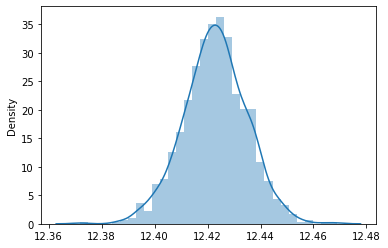

In [27]:
_ = sns.distplot(bs_means)

# 4) Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

I would use a one-sample test because the samples from the same population.

# 5) In this situation, is it appropriate to use the t or z statistic?

I would use a t statistic because in this case, I am using the sample standard deviation.

In [28]:
stats.ttest_ind(df['usage_yr'],bs_means)

Ttest_indResult(statistic=0.0011669529397822273, pvalue=0.999068906924862)

It appears that the t-test between the original sample of the body temperatures and the means of a bootstrapped sample of 100,000 iterations gave a p-value of '0.99'.

# 6) Z-test

In [29]:
def ztest(sample, mu):
    mean= np.mean(sample)
    std = np.std(sample)
    sqrtn = np.sqrt(len(sample))
    stdbar = std/sqrtn
    z = (mean-mu)/stdbar
    return z

In [30]:
zscore = ztest(df['usage_yr'],12.4)

In [31]:
stats.norm.sf(abs(zscore))*2

0.0651282700772909

# 7) Smaller Sample Size 1= 10

In [32]:
def bootstrap_test2(sample,sample_size, iterations):
    means = np.empty(iterations)
    for i in range(iterations):
        new_sample = np.random.choice(sample,size=sample_size)
        n_mean = np.mean(new_sample)
        means[i]=n_mean
    mu = np.mean(means)
    std = np.std(means)
    return means, mu, std

In [33]:
ten_means, ten_mu, ten_std = bootstrap_test2(df['usage_yr'],10,10)

In [34]:
len(ten_means)

10

In [35]:
stats.ttest_ind(df['usage_yr'],ten_means)

Ttest_indResult(statistic=-0.3792087734372985, pvalue=0.7045329920523095)

In [36]:
zscoreten = ztest(ten_means,12.4)
stats.norm.sf(abs(zscoreten))*2

0.34991261643419846

The t-test in this case is the correct one to use. With a small sample such as 10, we have a large standard deviation between the points and cannot assume a perfectly normal distribution as we would on the z-test. The ztest tells us that this test is significant to 99% whereas the ttest tells us that this value is not even at 90%. This shows us that, given a smaller sample size; we may have a large fluctuation of means and the ttest should be used when we do have a small sample size.

# 8) Correlation Heatmap

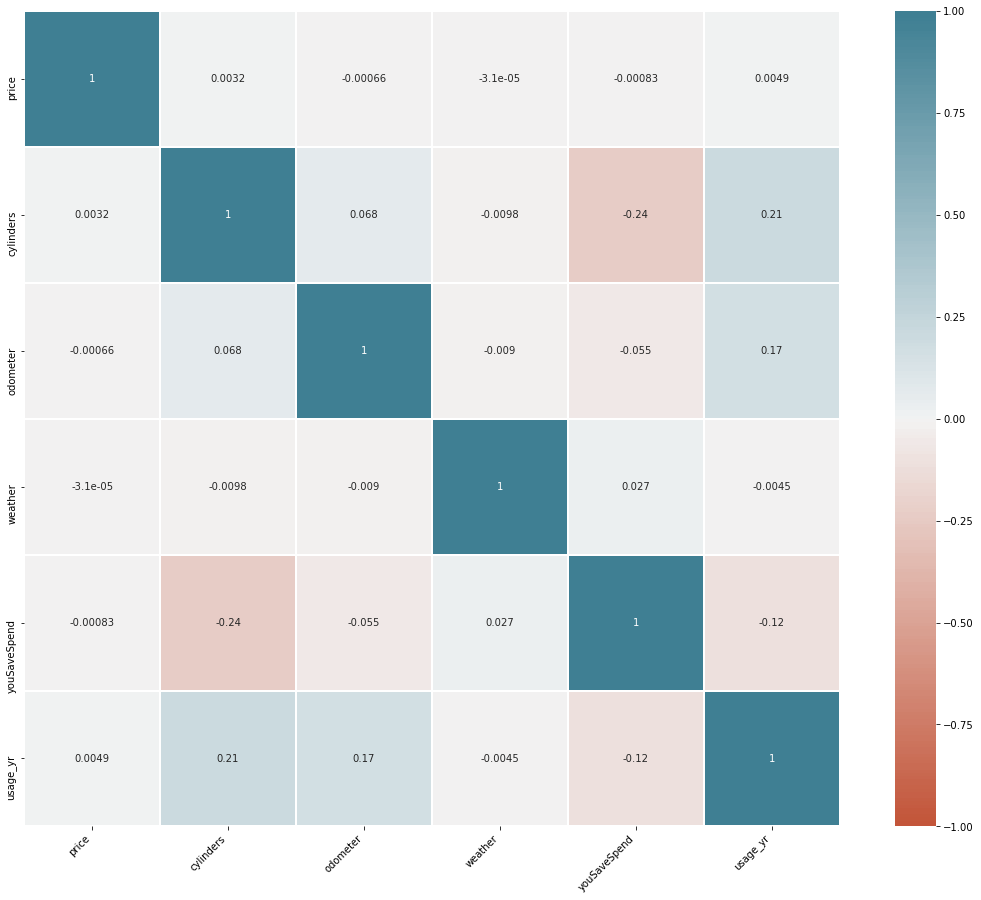

In [10]:
corr = df.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    linewidths=1
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#plt.savefig('normalized_heatmap.png')

Among the above numerical features, there seems not much strong correlation to each other whose correlations go beyond the absolute range of '0.5'.